In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('A3-data.txt', sep=',')

data.head()

,x,y,z,t,class
0,-0.031676,-9.912054,-0.579436,-1.044239,1
1,0.002526,6.172456,3.288339,-1.006427,5
2,0.183123,-0.387841,6.236470,-1.691491,2
3,-0.042262,-1.996272,-1.655302,-2.995311,1
4,-0.062811,-0.417072,6.657475,-3.633134,4


### PCA

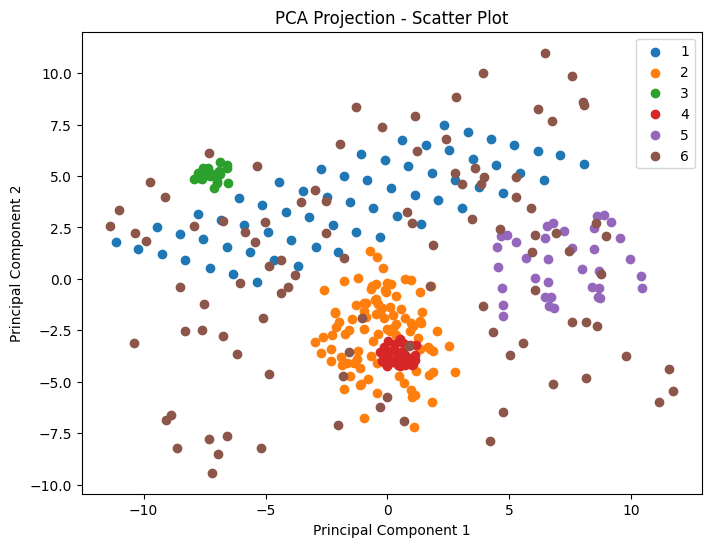

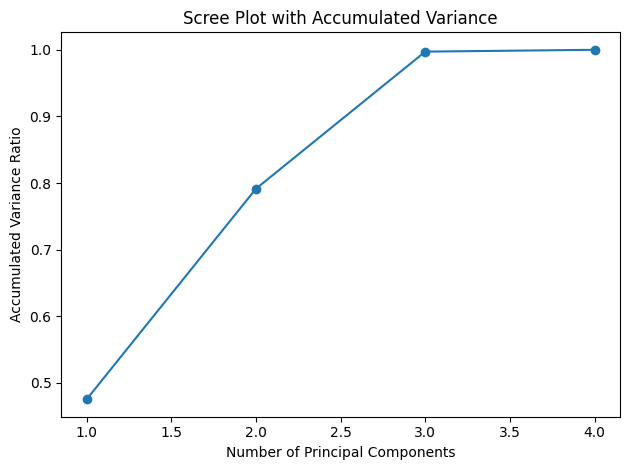

In [34]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=4)

X = data.drop('class', axis=1)
y = data['class']
X_pca = pca.fit_transform(X)

# Plotting the scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)


plt.legend()

plt.title('PCA Projection - Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

# Scree plot with accumulated variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Scree Plot with Accumulated Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accumulated Variance Ratio')

plt.tight_layout()
plt.show()

## TSNE

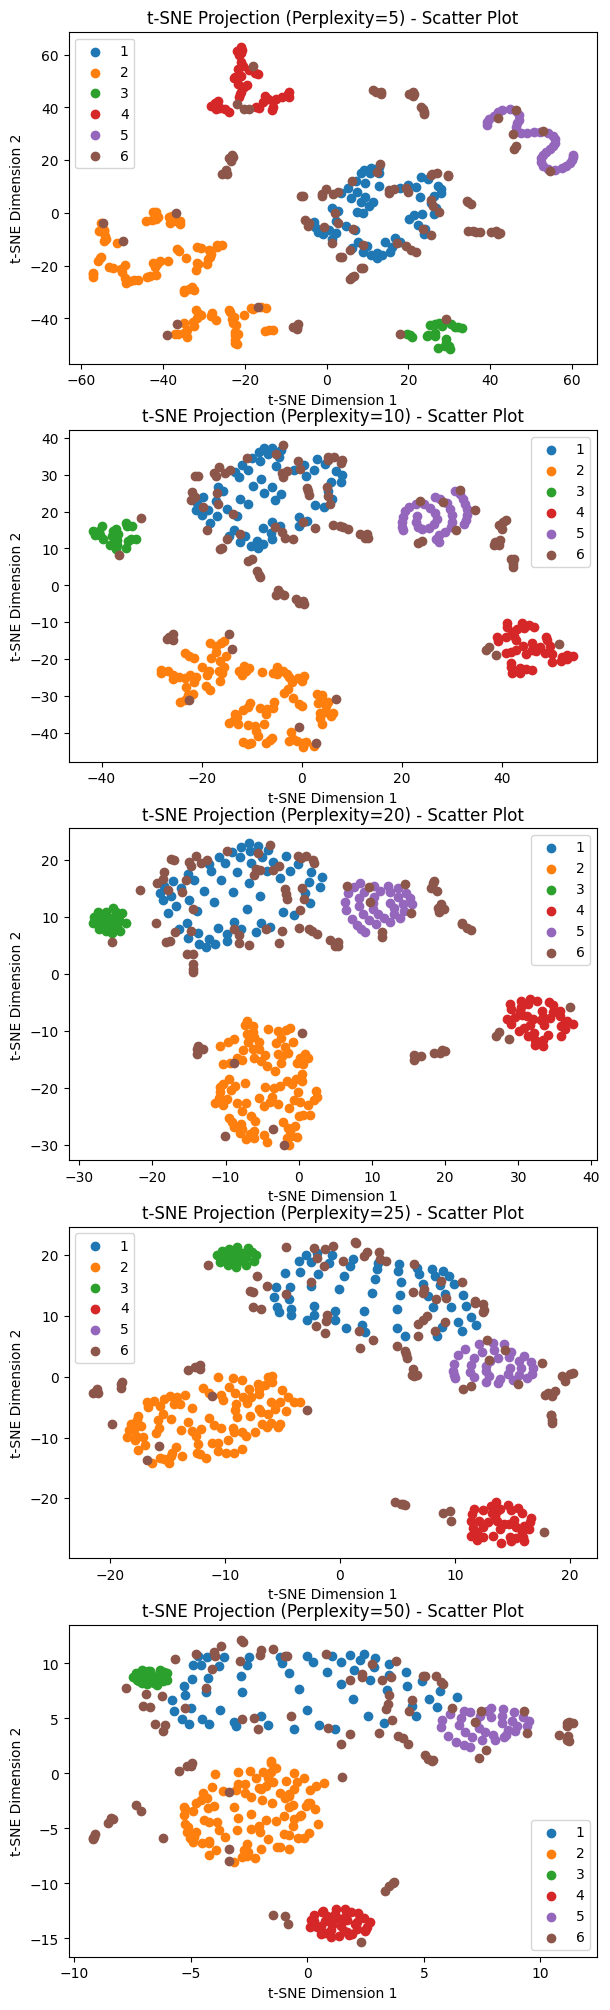

In [6]:
from sklearn.manifold import TSNE

X = data.drop('class', axis=1)
y = data['class']

# Define t-SNE parameters (you can experiment with different values)
perplexities = [5, 10, 20, 25, 50]

# Plot t-SNE projections for different perplexities
plt.figure(figsize=(15, 5 * len(perplexities)))

for i, perplexity in enumerate(perplexities):
    # Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Scatter plot for each class with different colors
    plt.subplot(len(perplexities), 2, 2 * i + 1)
    for c in np.unique(y):
        plt.scatter(X_tsne[y == c, 0], X_tsne[y == c, 1], label=c)



    plt.title(f't-SNE Projection (Perplexity={perplexity}) - Scatter Plot')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend()

plt.show()

## K-Means

C:\Users\Miquel Alvarez Ruiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Miquel Alvarez Ruiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Miquel Alvarez Ruiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init`

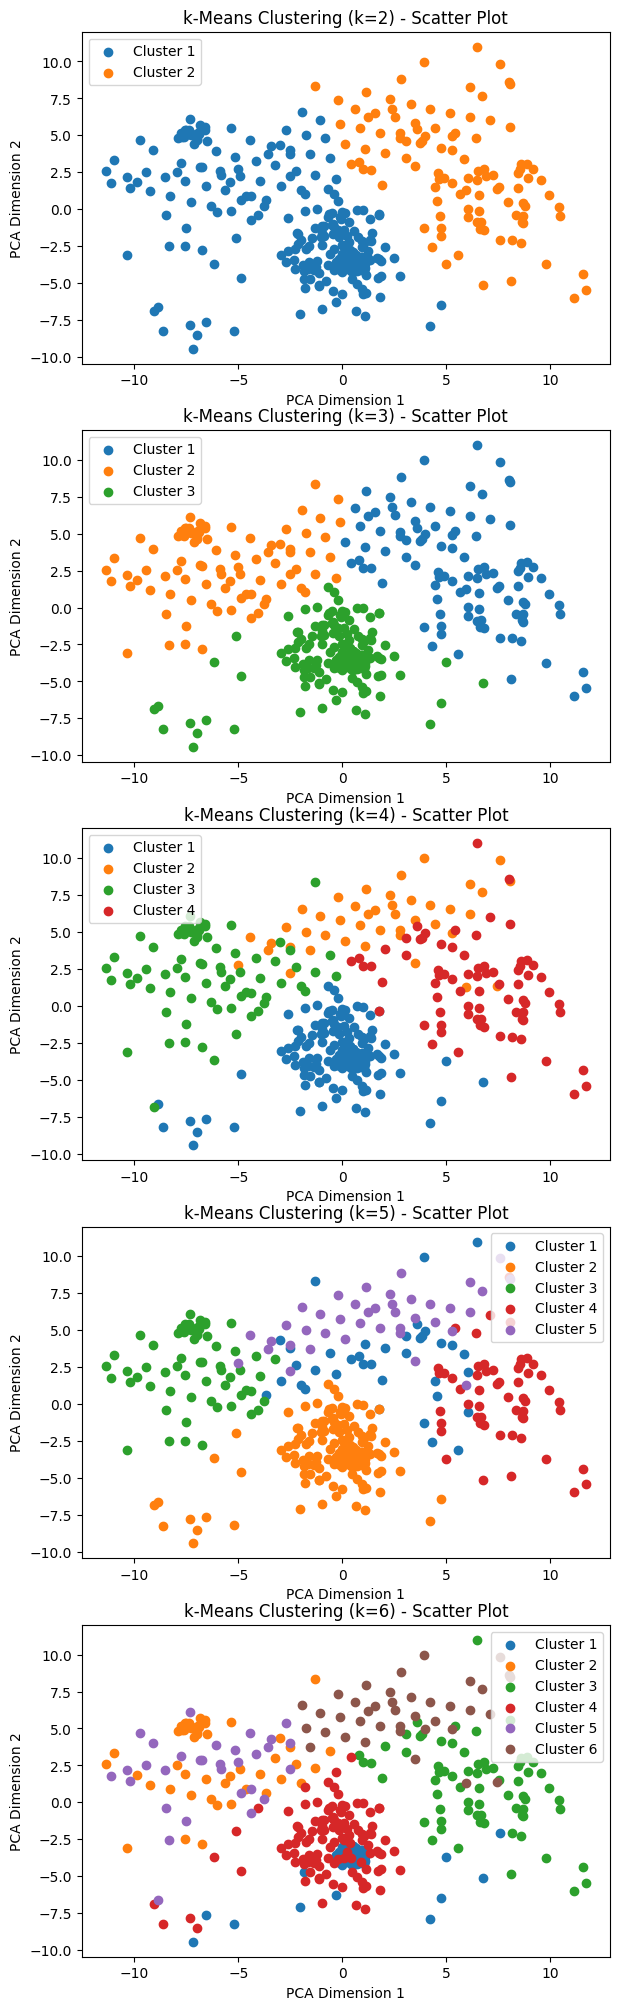

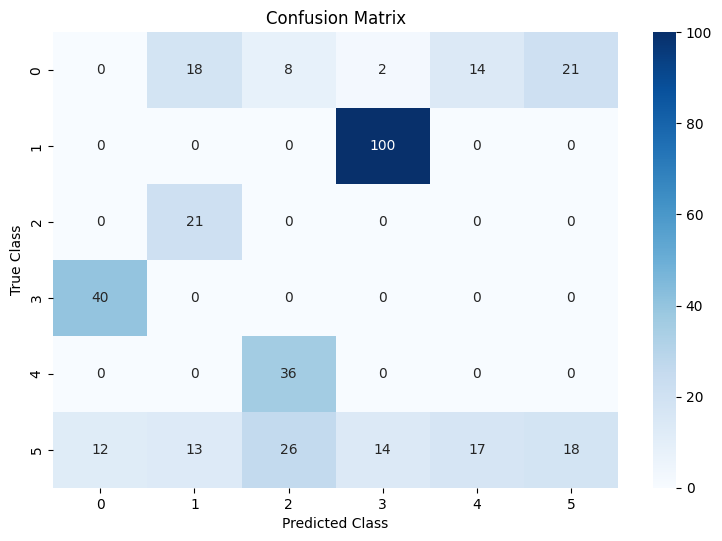

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = data['class']
# Define values of k for k-means clustering
k_values = [2, 3, 4, 5, 6]

# Plot k-means results for different values of k
plt.figure(figsize=(15, 5 * len(k_values)))

for i, k in enumerate(k_values):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)

    # Scatter plot with colors based on k-means clusters
    plt.subplot(len(k_values), 2, 2 * i + 1)
    for j in range(k):
        plt.scatter(X_pca[y_pred == j, 0], X_pca[y_pred == j, 1], label=f'Cluster {j + 1}')

    plt.title(f'k-Means Clustering (k={k}) - Scatter Plot')
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')
    plt.legend()

plt.show()

# Show confusion matrix in a separate plot for k = true number of classes
plt.figure(figsize=(15, 5 * len(k_values)))
y_pred += 1
cm = confusion_matrix(y_true, y_pred)
plt.subplot(len(k_values), 2, 2 * len(k_values))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.tight_layout()
plt.show()

## AHC

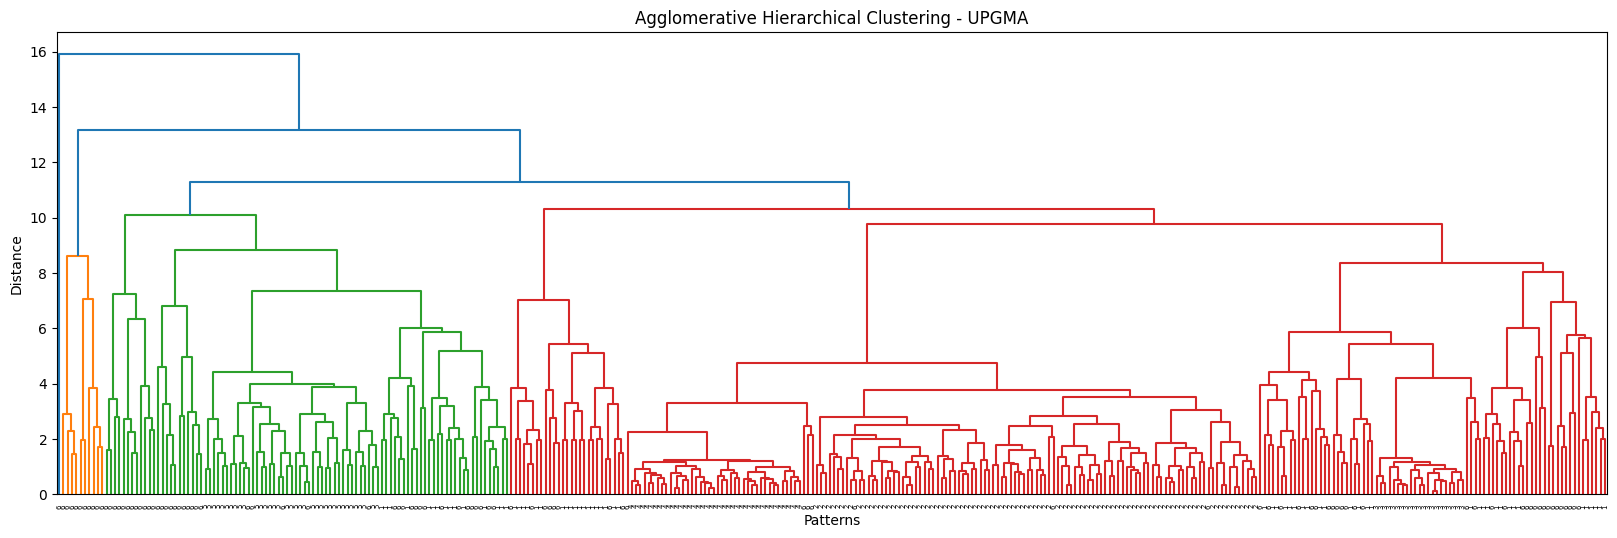

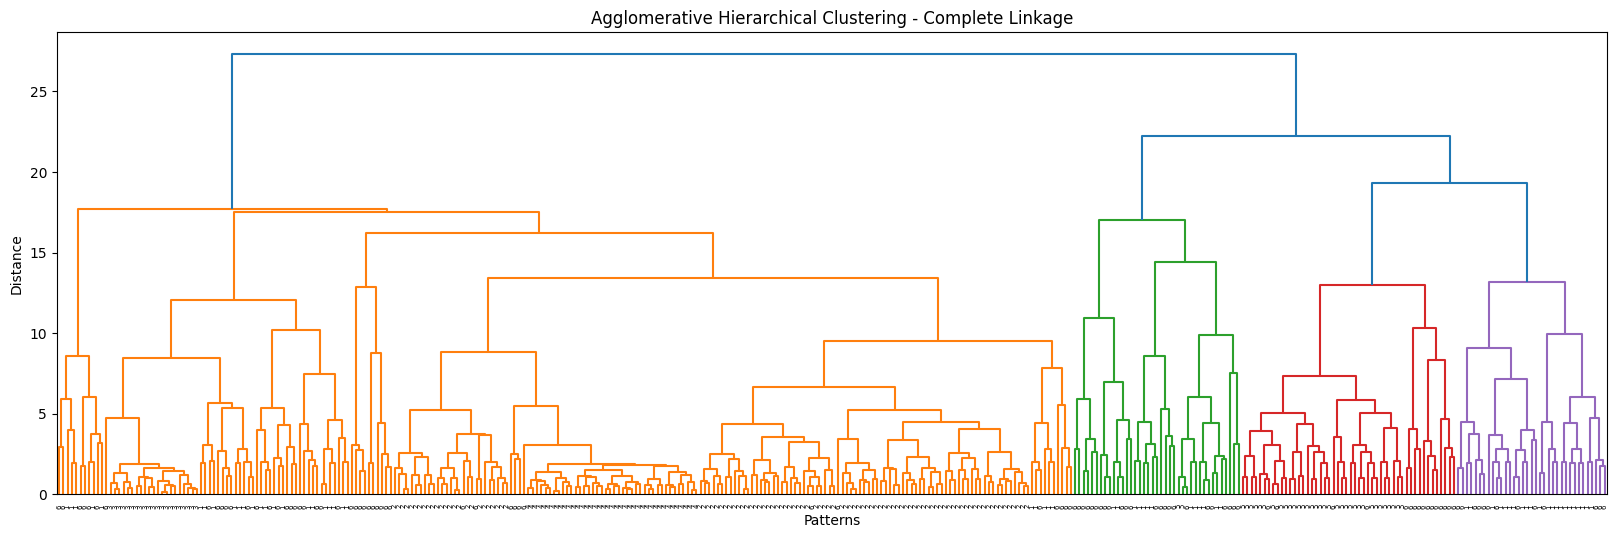

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist

# Calculate the distance matrix without using the class labels
distance_matrix = pdist(X)

# Calculate the linkage matrix using UPGMA method
Z_upgma = linkage(distance_matrix, method='average')

# Plot the dendrogram for UPGMA
plt.figure(figsize=(20, 6))
dendrogram(Z_upgma, labels=data['class'].values)
plt.title('Agglomerative Hierarchical Clustering - UPGMA')
plt.xlabel('Patterns')
plt.ylabel('Distance')
plt.show()

# Calculate the linkage matrix using CL method
Z_cl = linkage(distance_matrix, method='complete')

# Plot the dendrogram for CL
plt.figure(figsize=(20, 6))
dendrogram(Z_cl, labels=data['class'].values)
plt.title('Agglomerative Hierarchical Clustering - Complete Linkage')
plt.xlabel('Patterns')
plt.ylabel('Distance')
plt.show()

## SOM

Parameters: map_size=(10, 10), learning_rate=0.1, neighborhood_function=gaussian


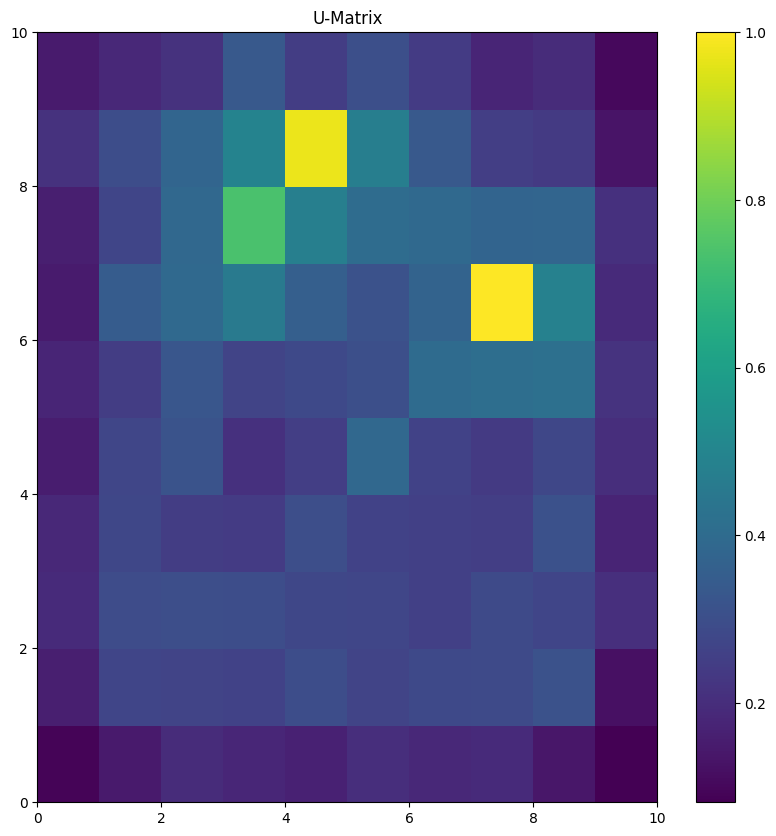

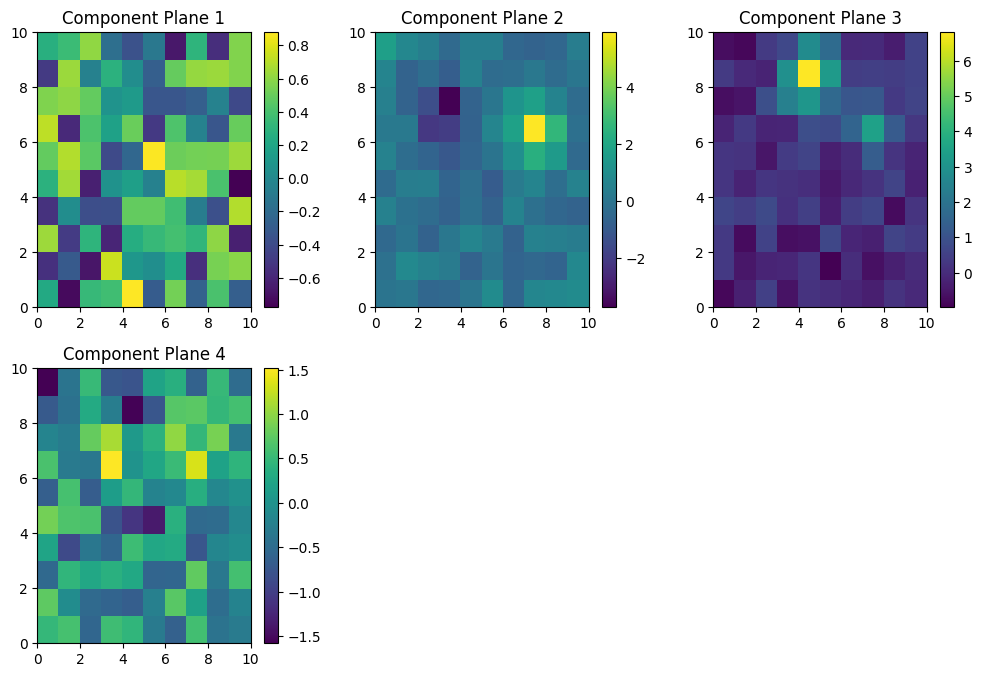

Parameters: map_size=(10, 10), learning_rate=0.1, neighborhood_function=bubble


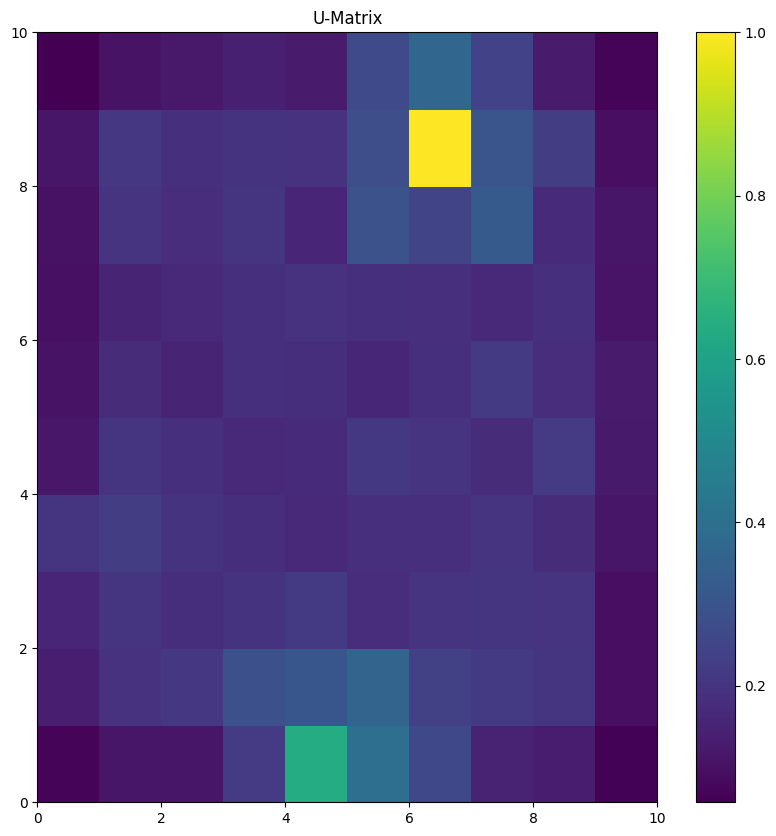

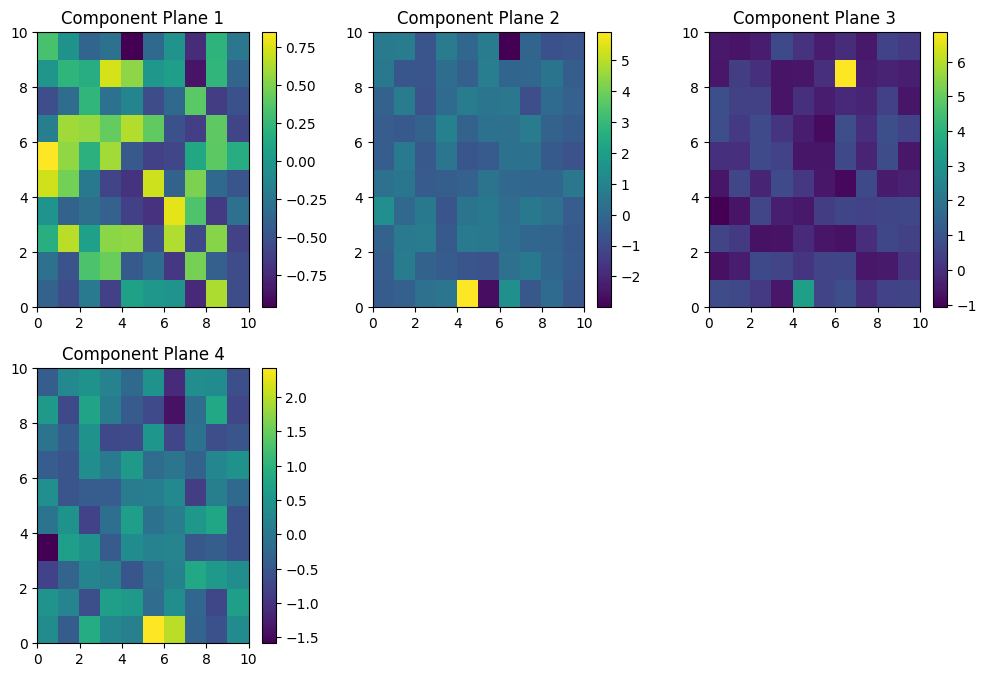

Parameters: map_size=(10, 10), learning_rate=0.1, neighborhood_function=triangle


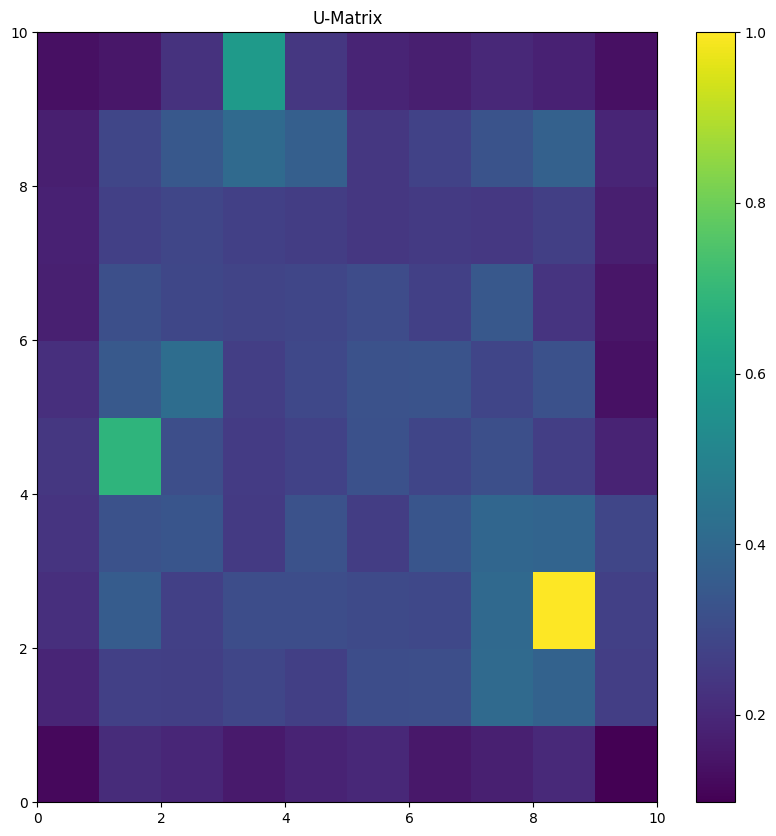

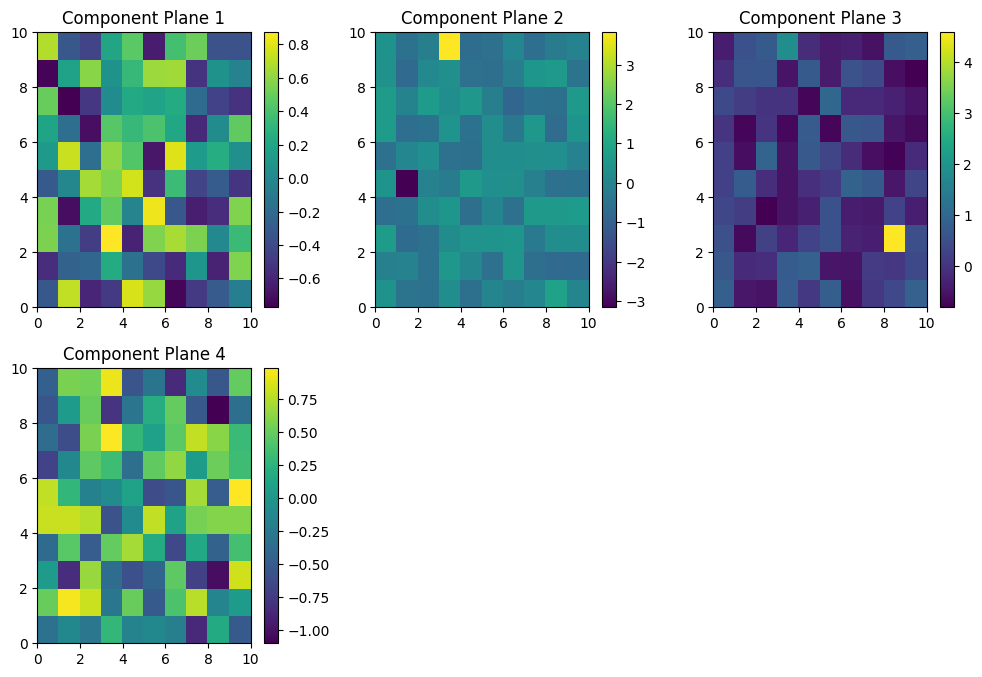

Parameters: map_size=(10, 10), learning_rate=0.5, neighborhood_function=gaussian


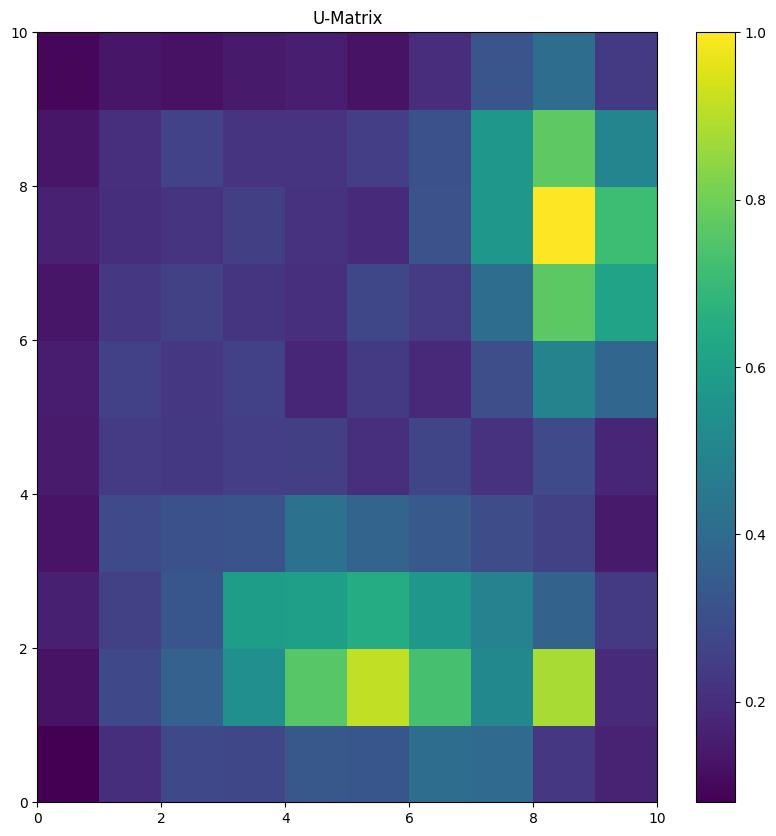

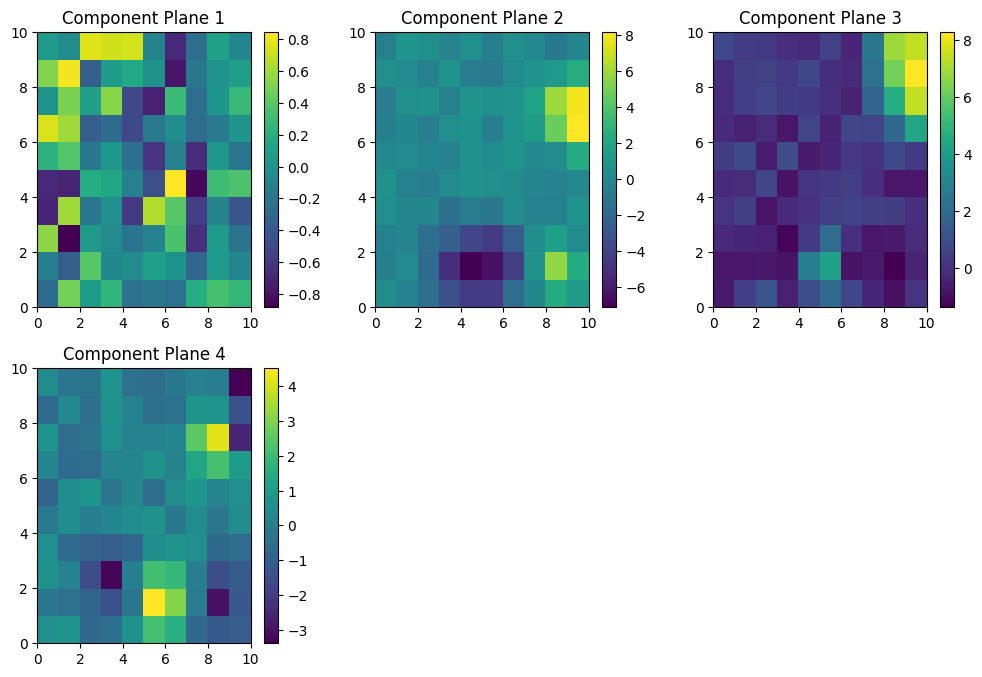

Parameters: map_size=(10, 10), learning_rate=0.5, neighborhood_function=bubble


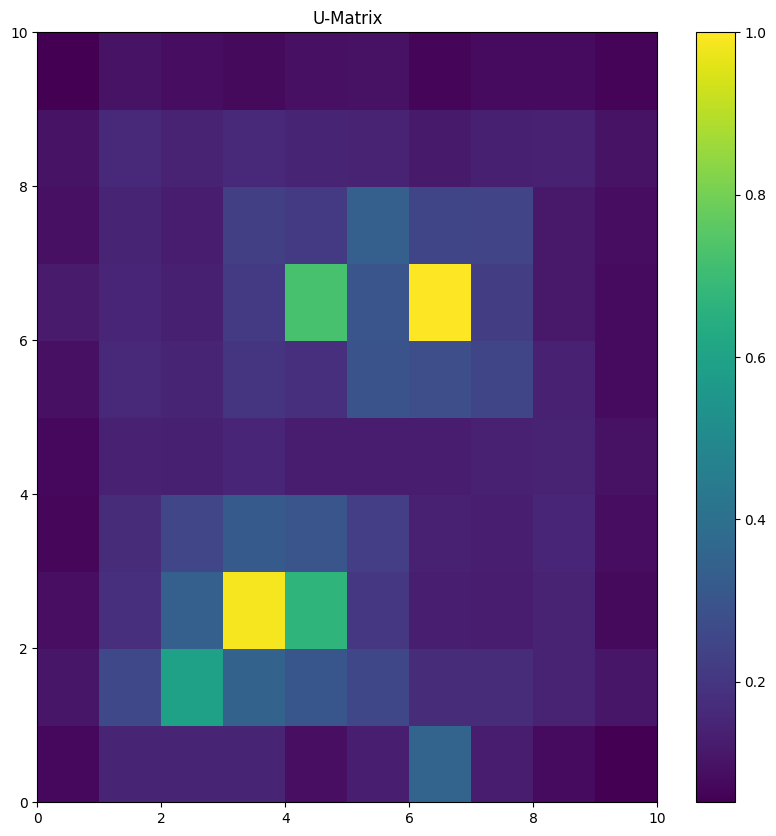

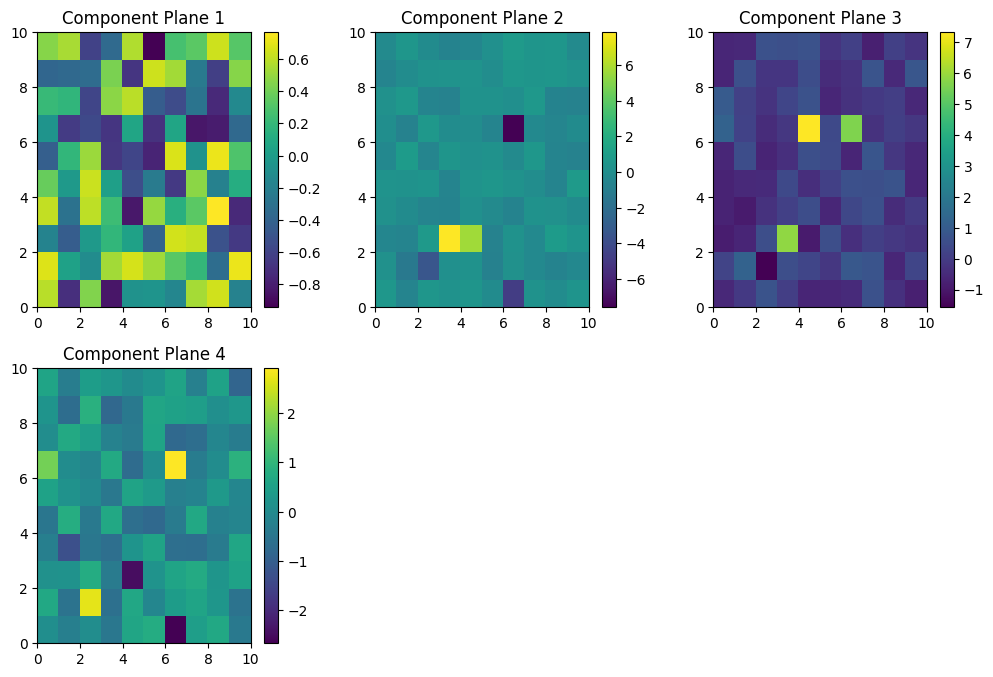

Parameters: map_size=(10, 10), learning_rate=0.5, neighborhood_function=triangle


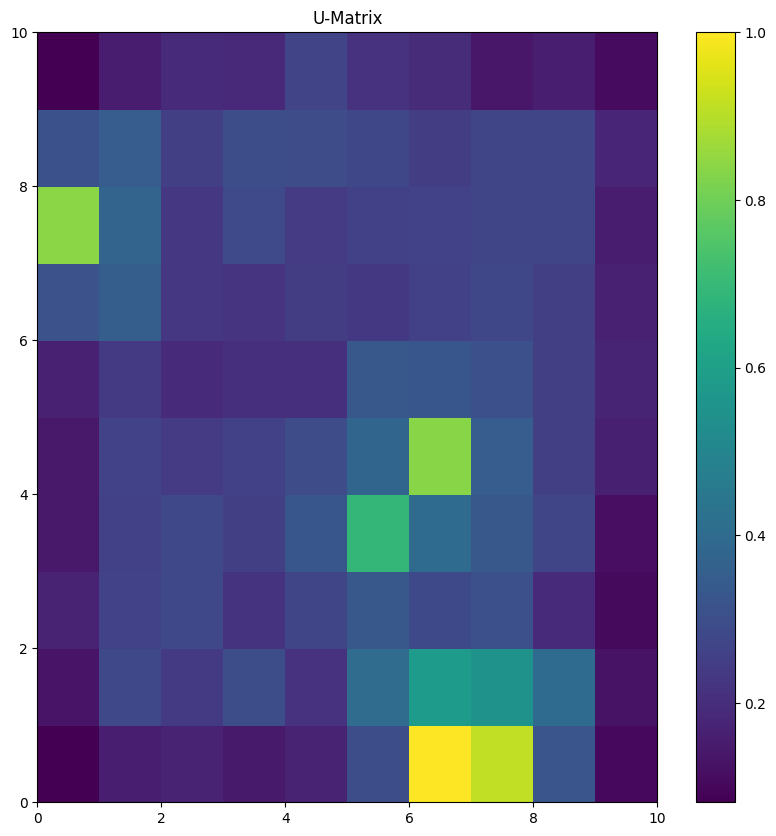

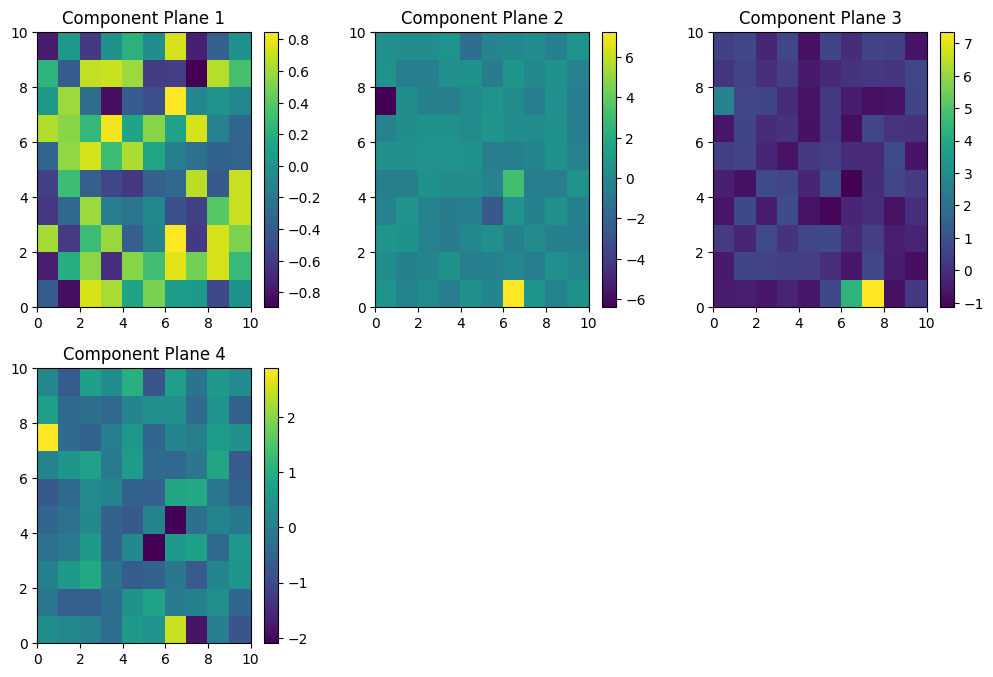

Parameters: map_size=(10, 10), learning_rate=0.9, neighborhood_function=gaussian


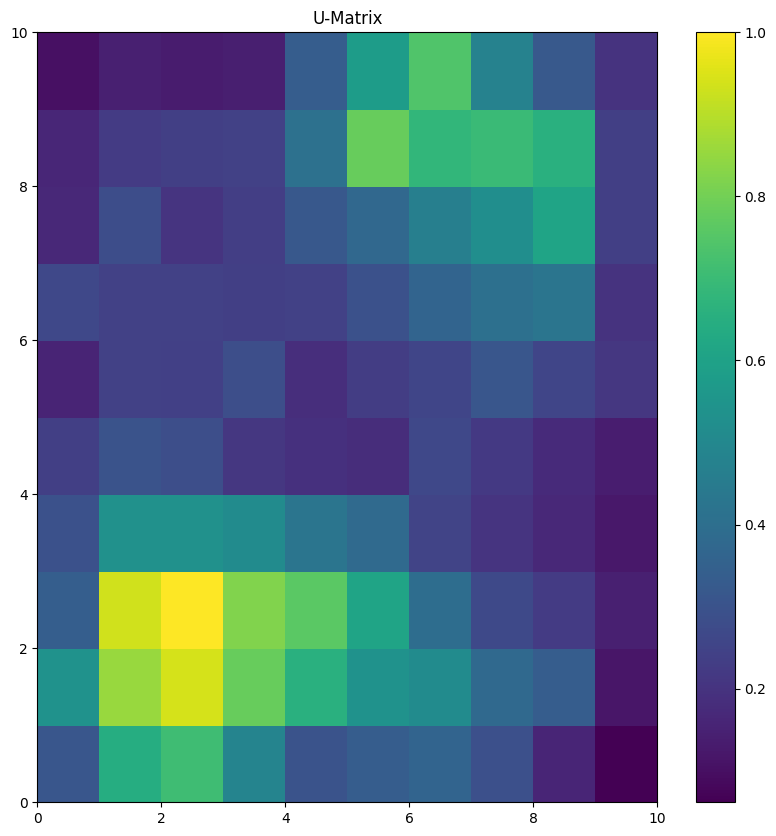

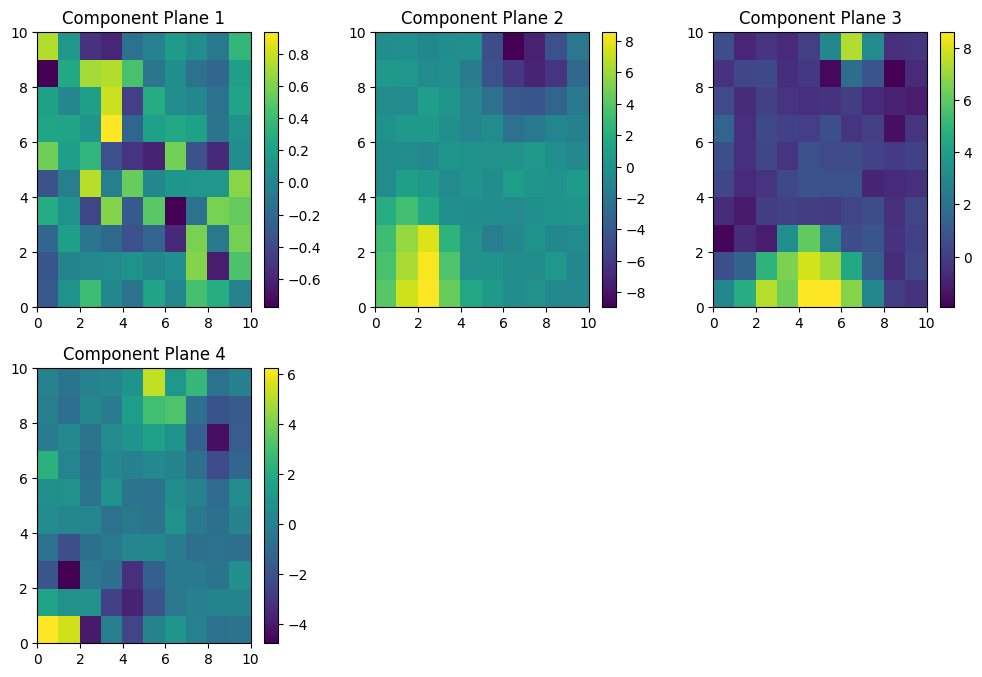

Parameters: map_size=(10, 10), learning_rate=0.9, neighborhood_function=bubble


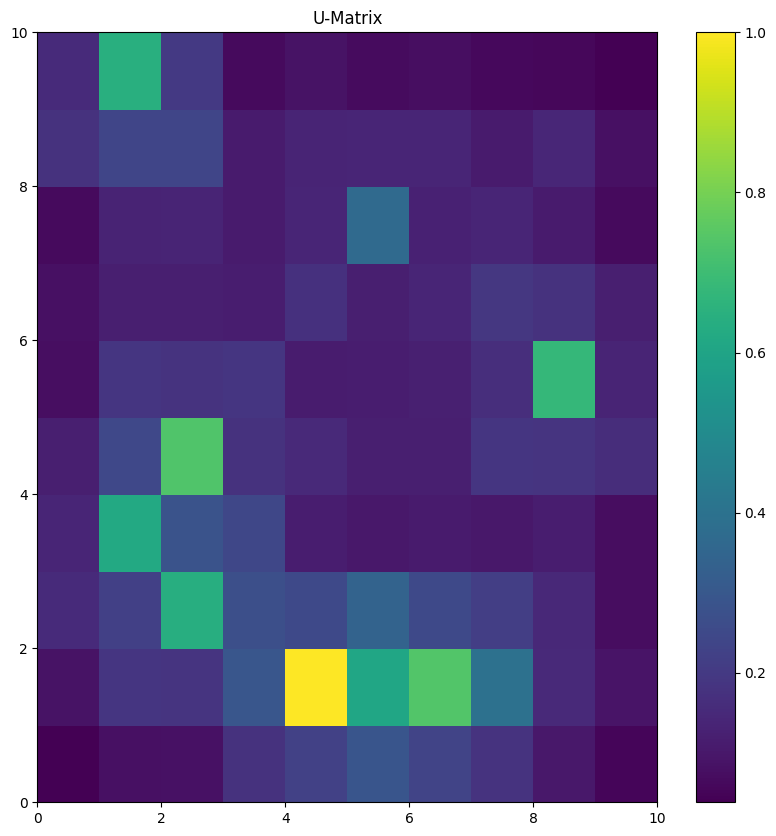

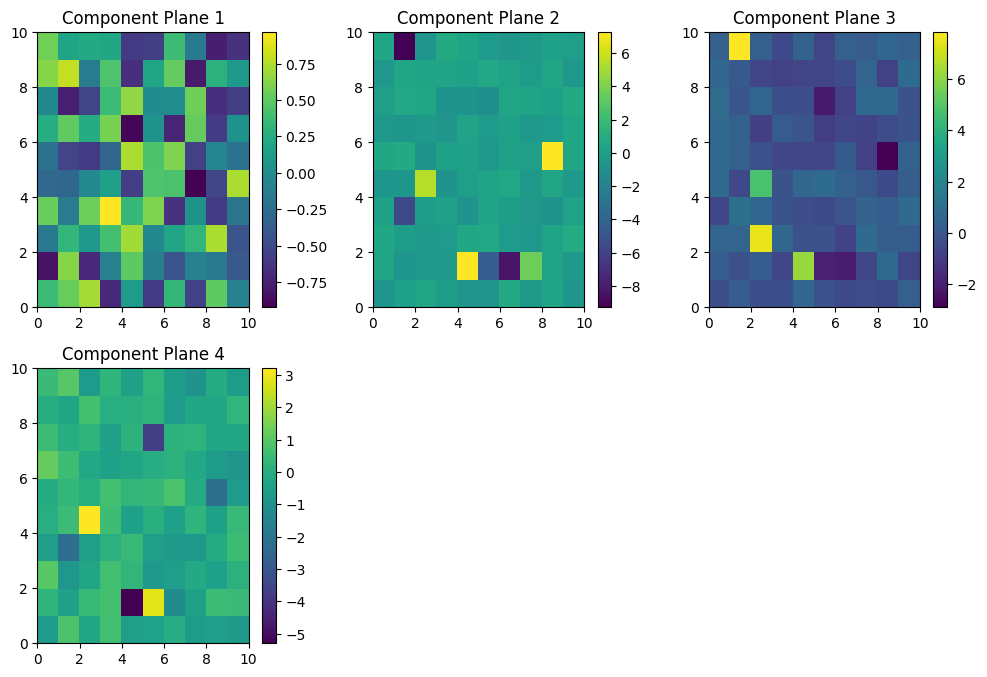

Parameters: map_size=(10, 10), learning_rate=0.9, neighborhood_function=triangle


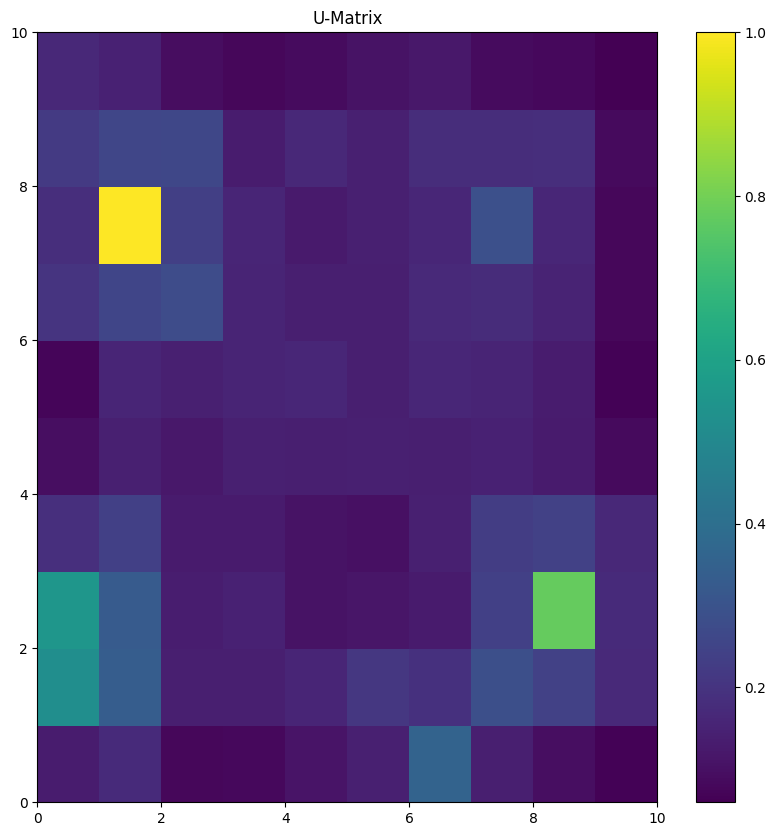

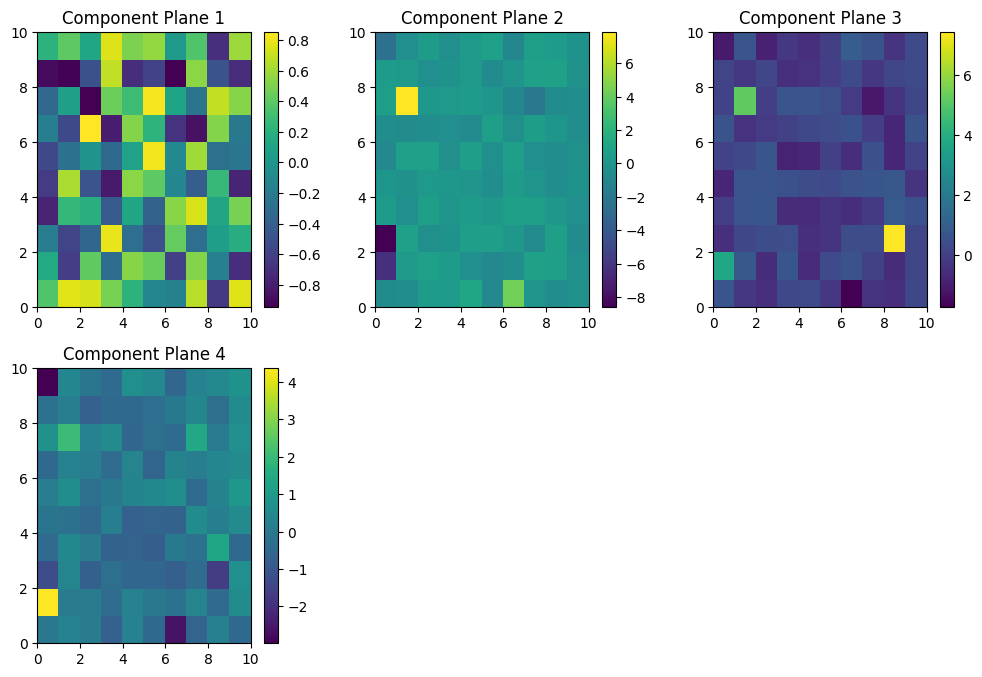

Parameters: map_size=(15, 15), learning_rate=0.1, neighborhood_function=gaussian


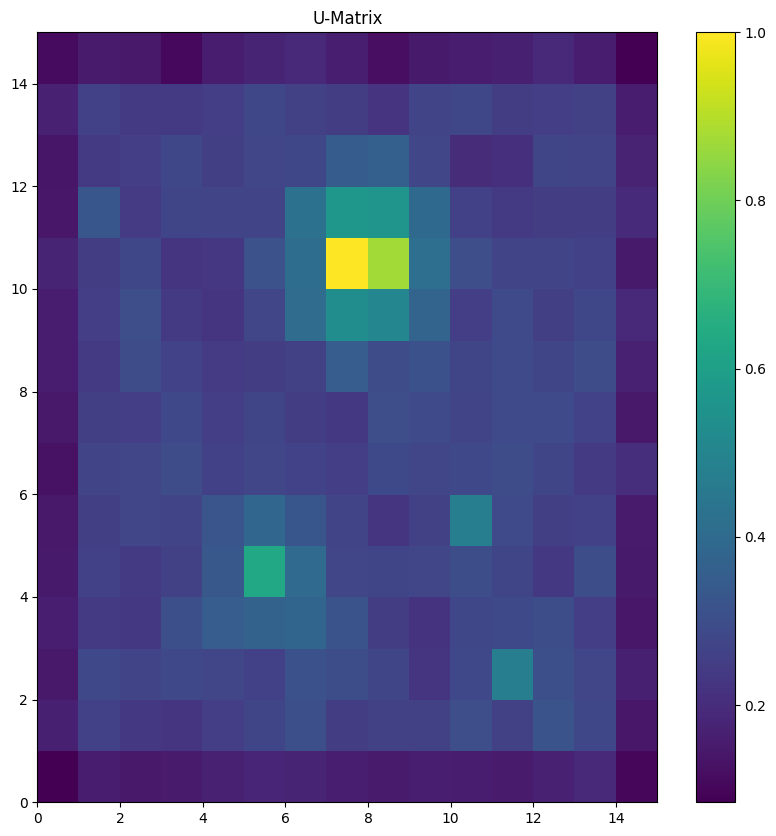

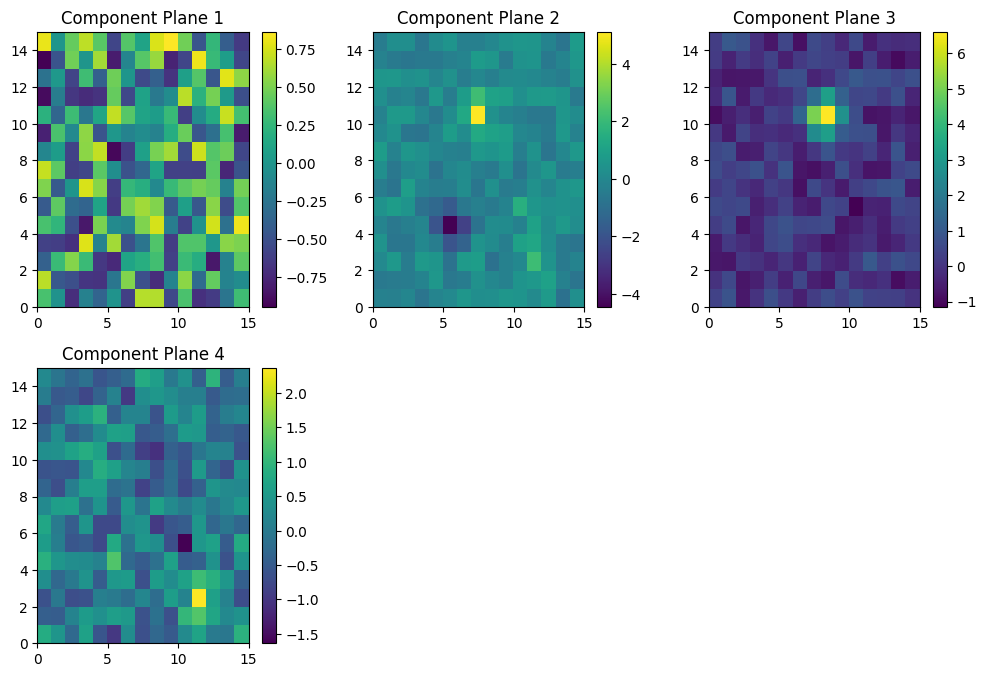

Parameters: map_size=(15, 15), learning_rate=0.1, neighborhood_function=bubble


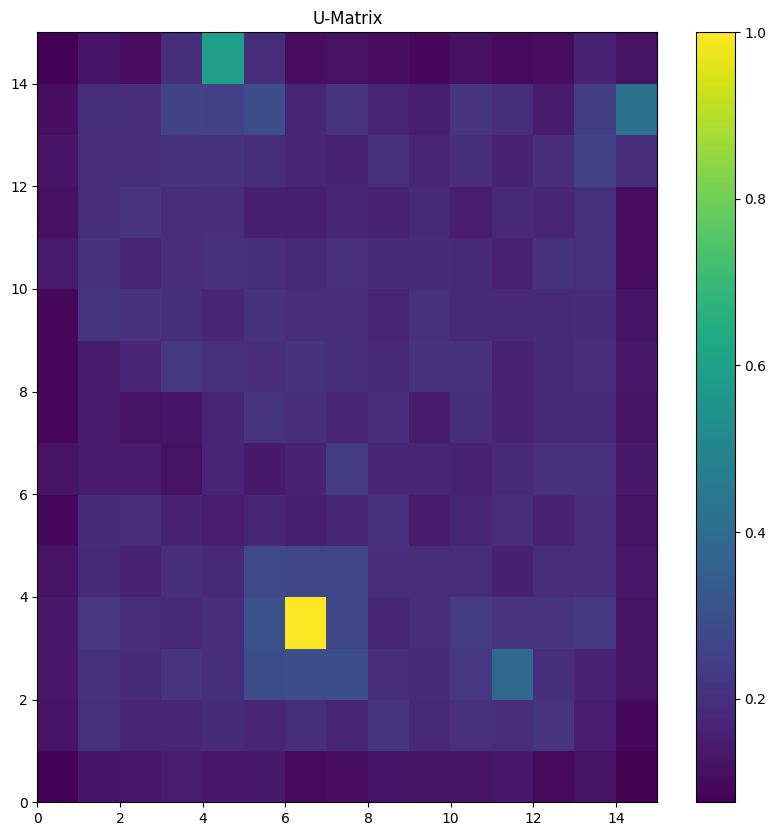

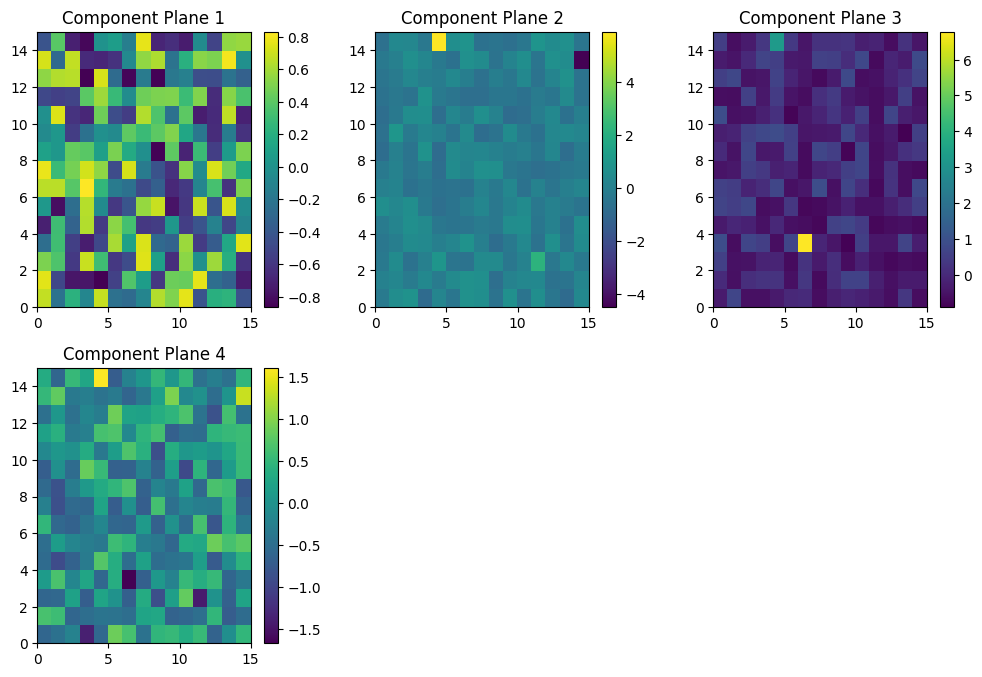

Parameters: map_size=(15, 15), learning_rate=0.1, neighborhood_function=triangle


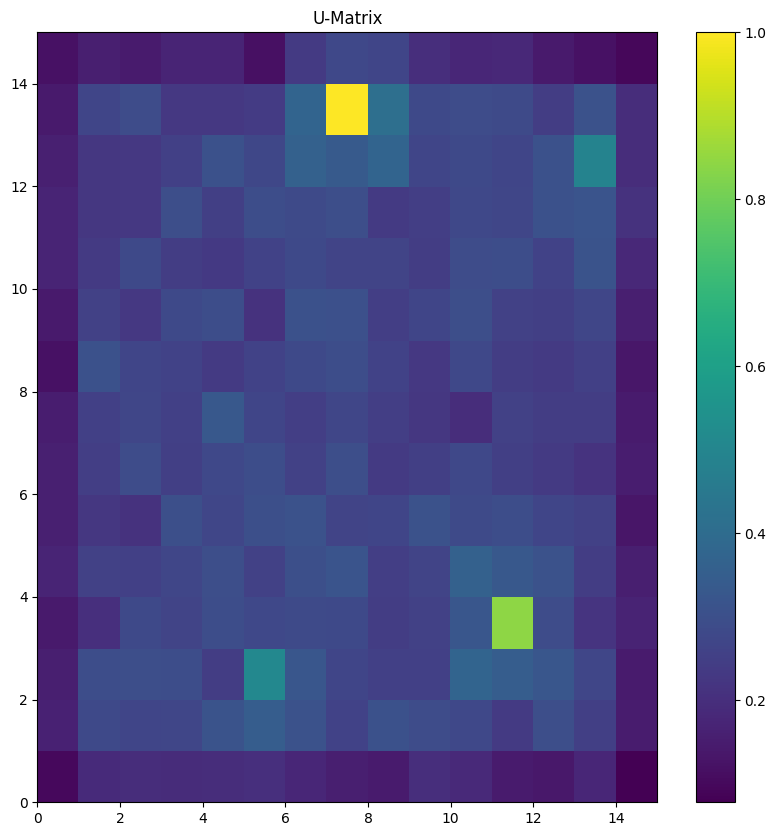

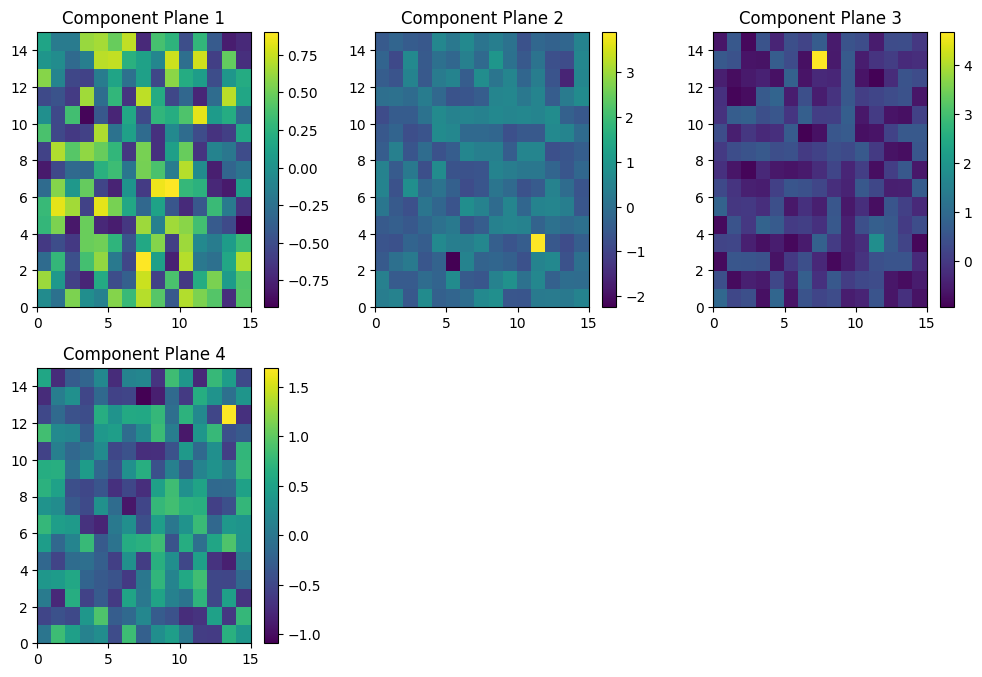

Parameters: map_size=(15, 15), learning_rate=0.5, neighborhood_function=gaussian


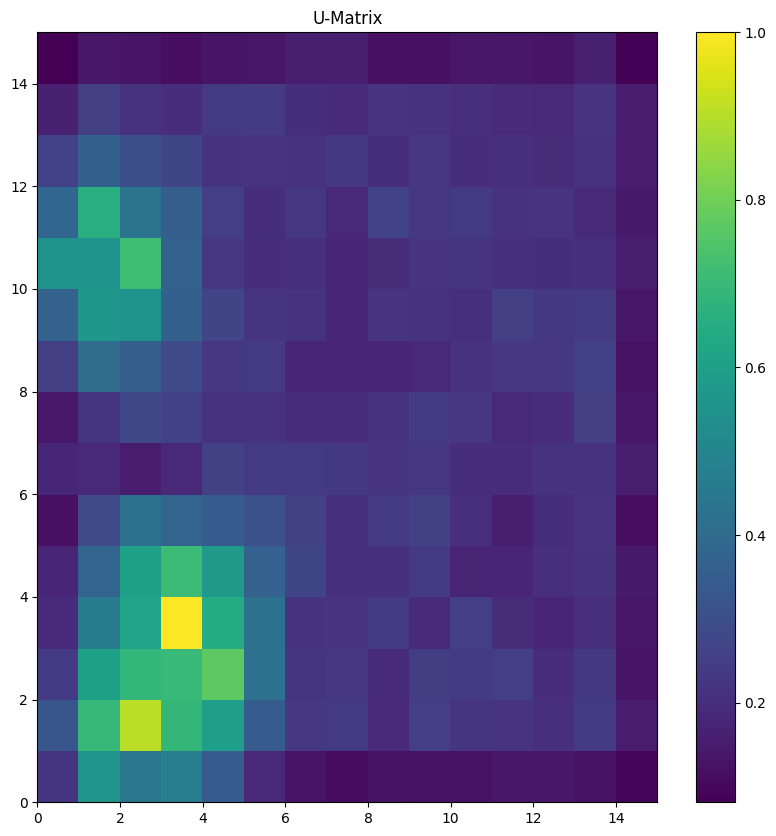

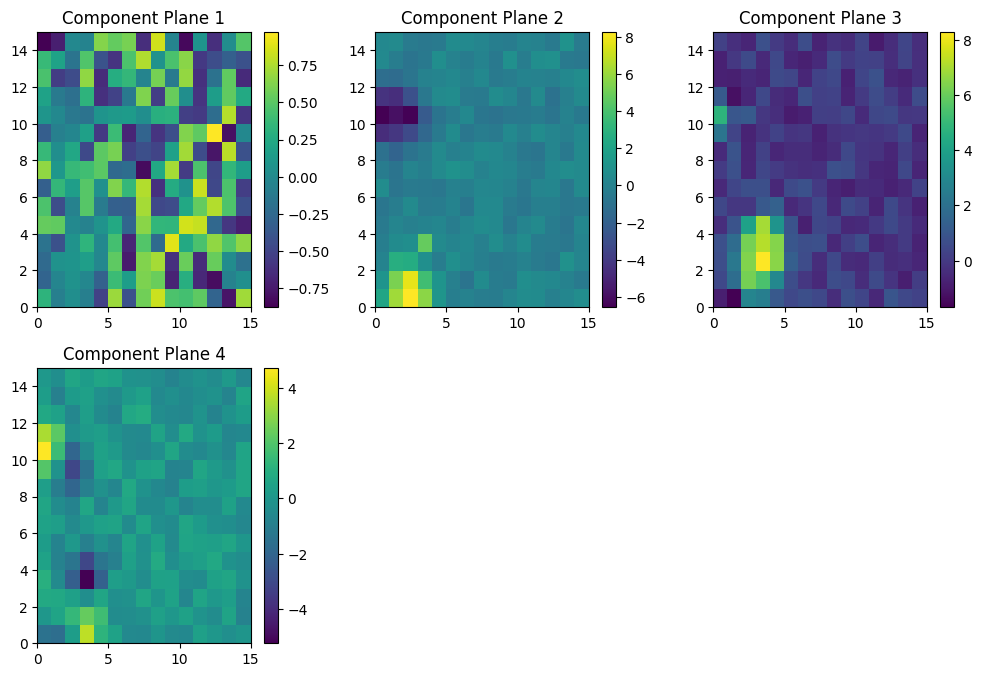

Parameters: map_size=(15, 15), learning_rate=0.5, neighborhood_function=bubble


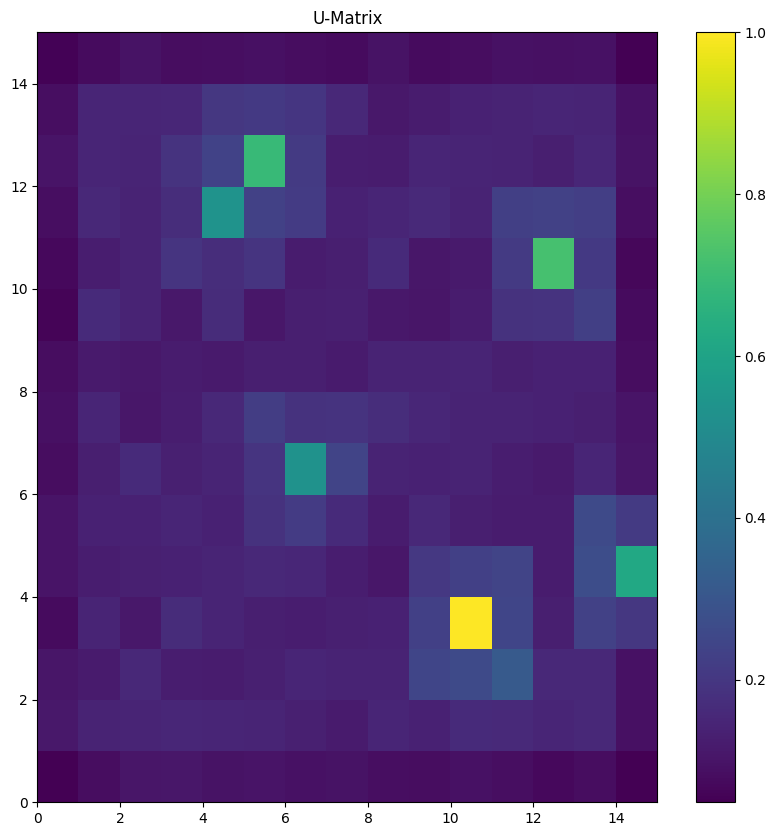

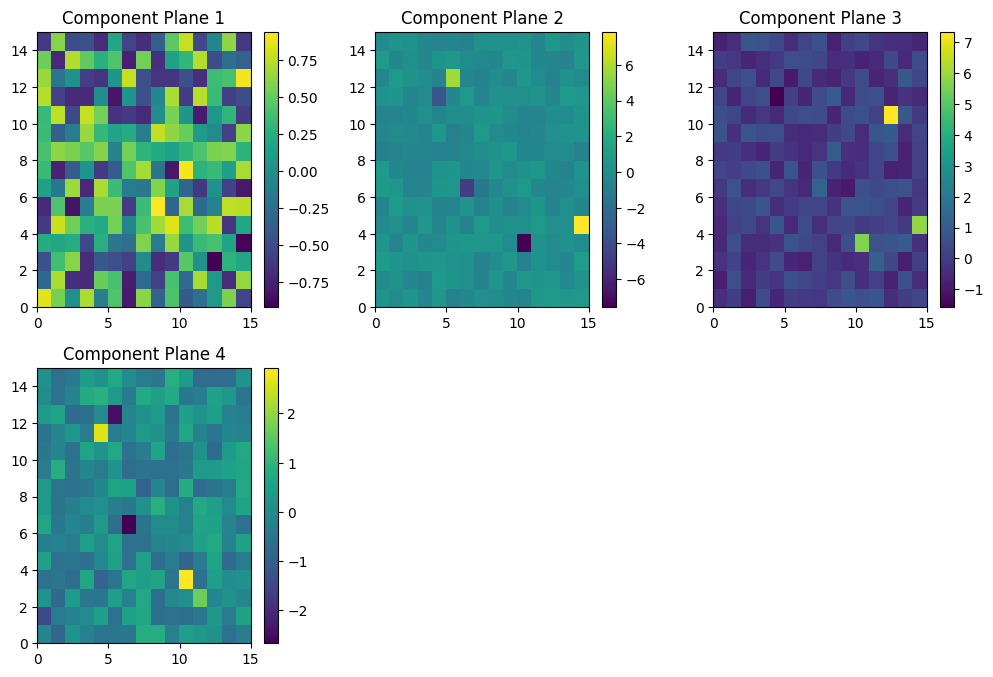

Parameters: map_size=(15, 15), learning_rate=0.5, neighborhood_function=triangle


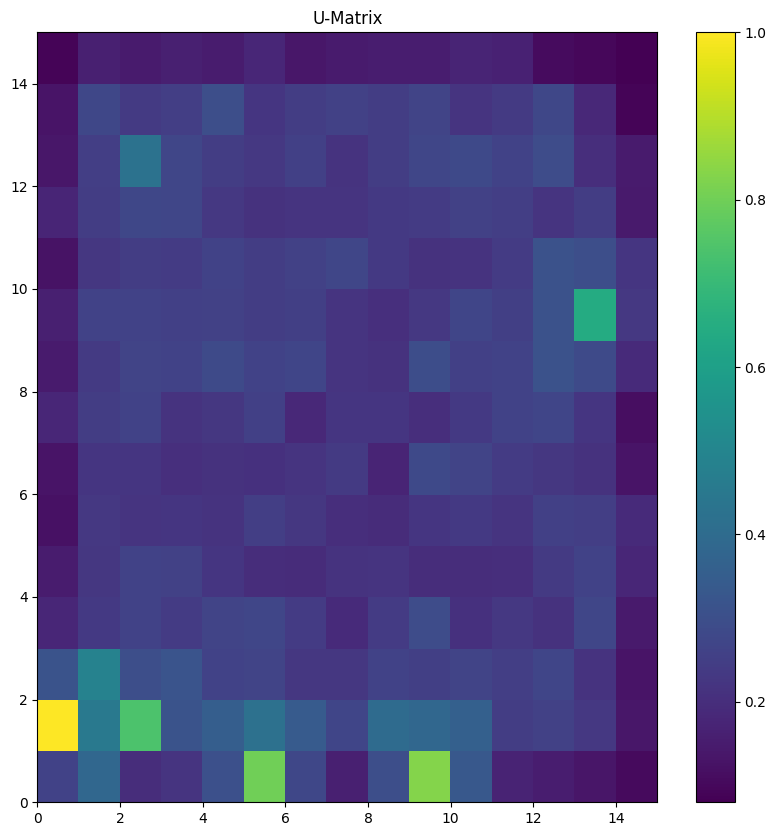

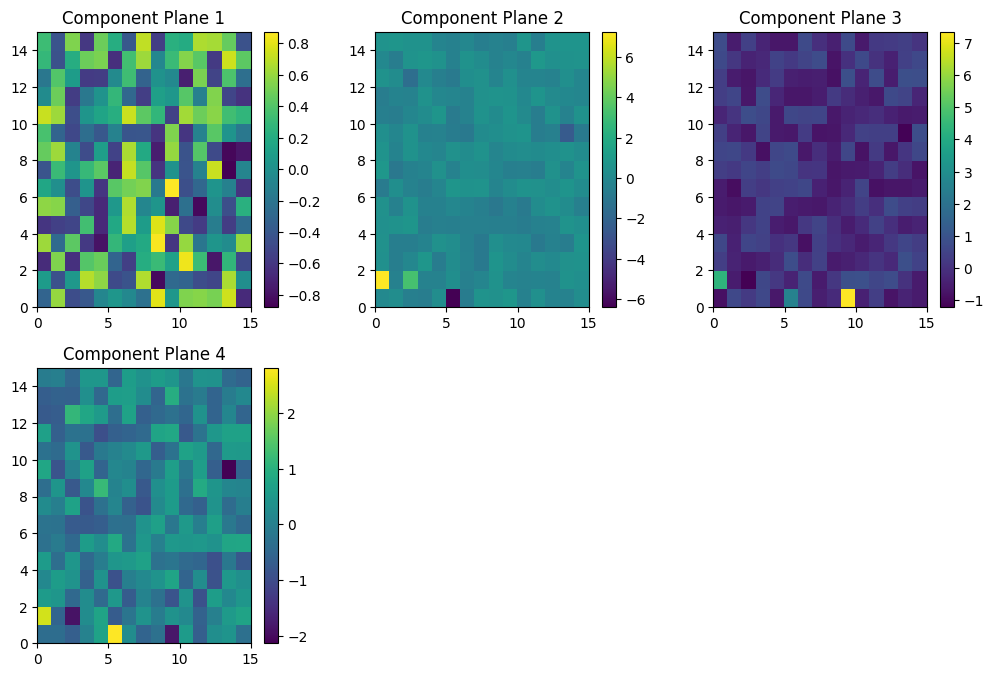

Parameters: map_size=(15, 15), learning_rate=0.9, neighborhood_function=gaussian


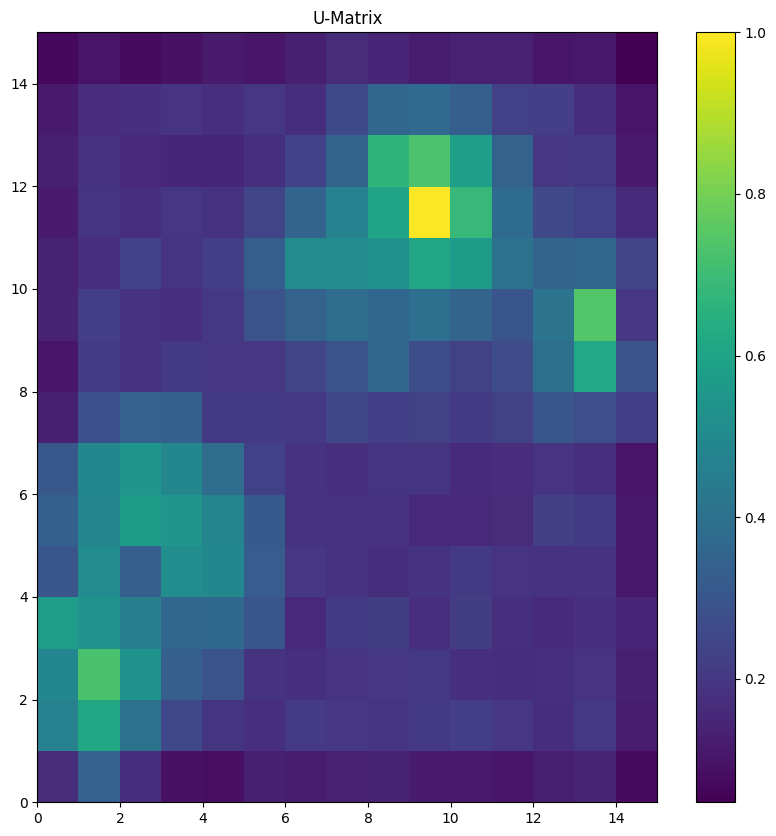

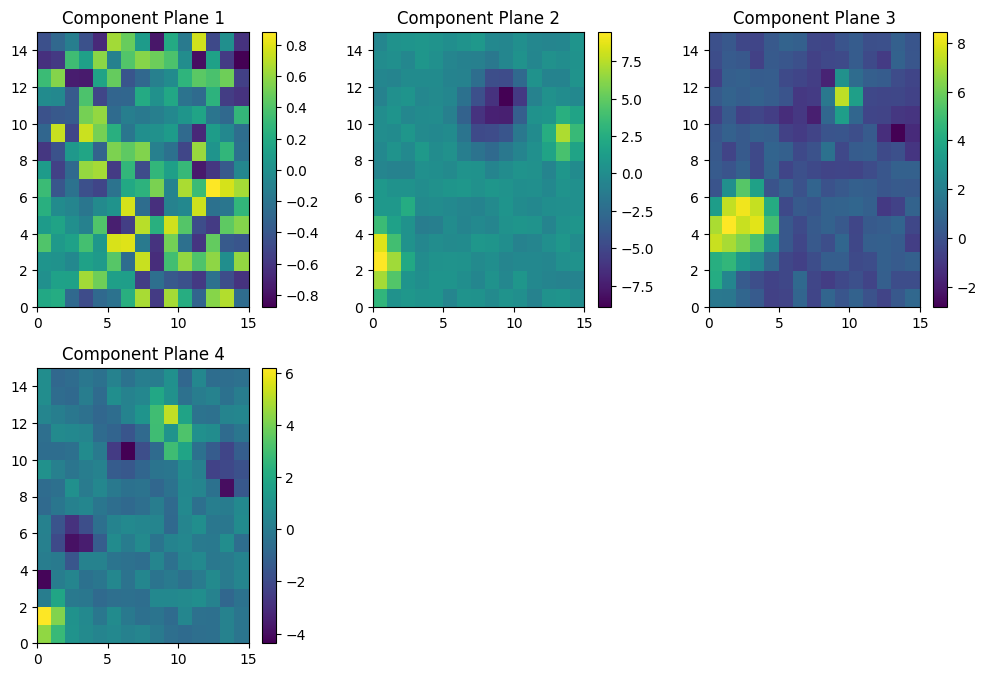

Parameters: map_size=(15, 15), learning_rate=0.9, neighborhood_function=bubble


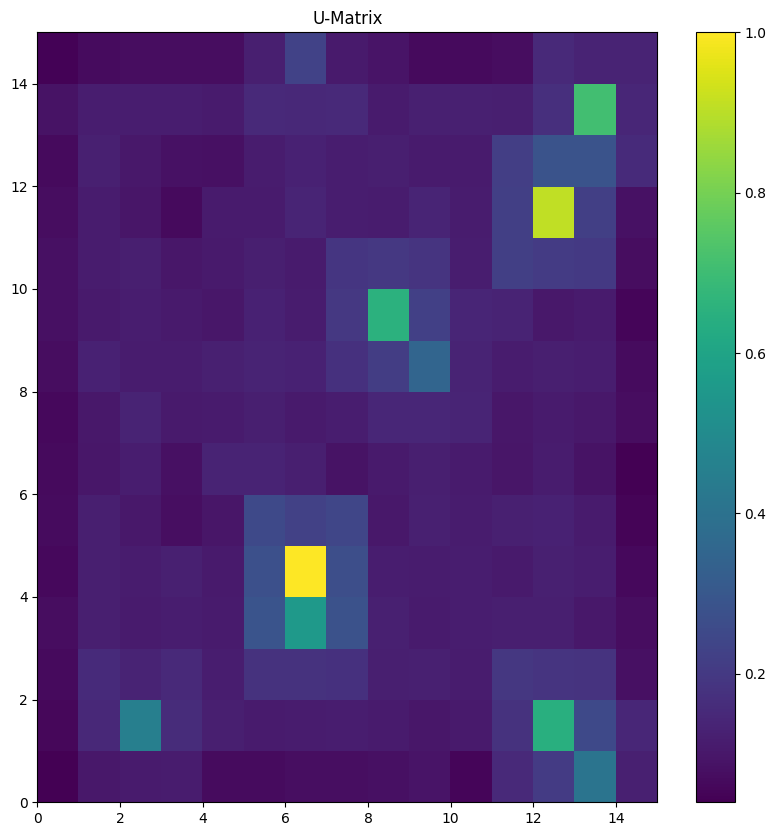

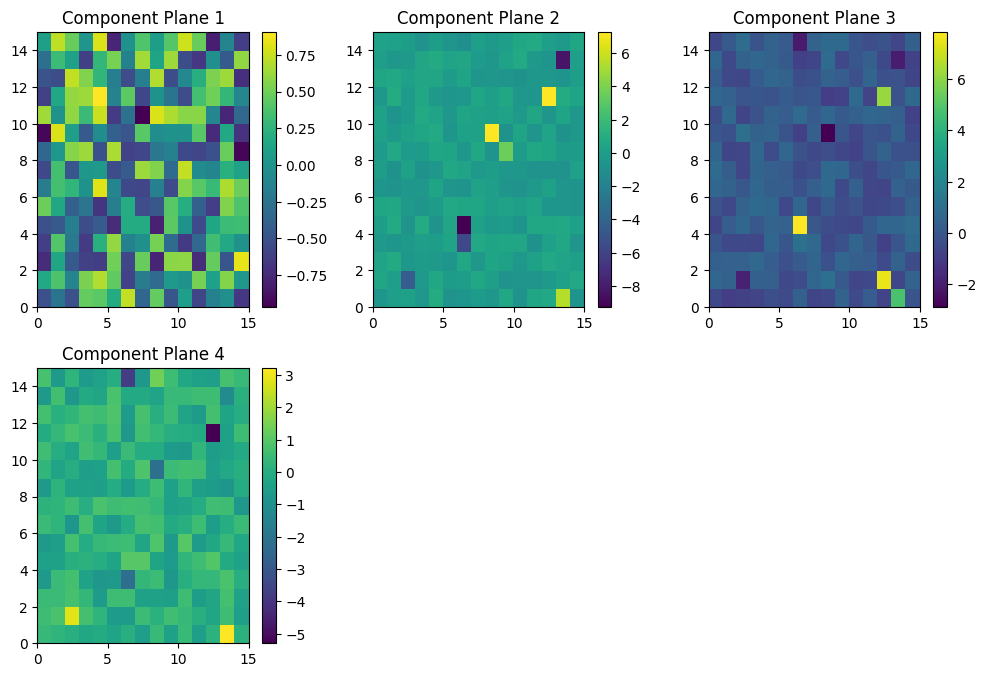

Parameters: map_size=(15, 15), learning_rate=0.9, neighborhood_function=triangle


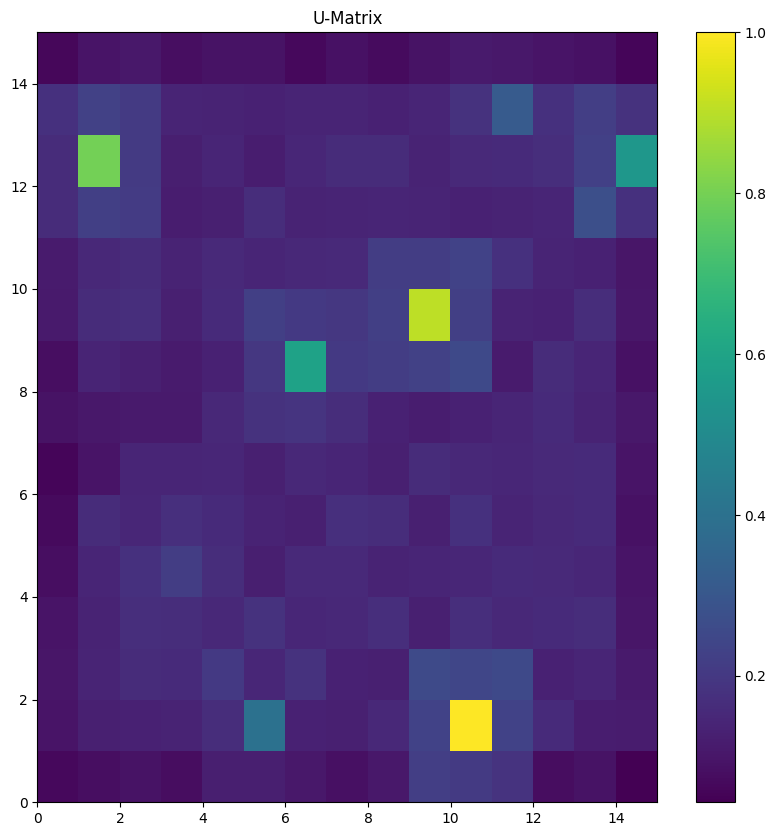

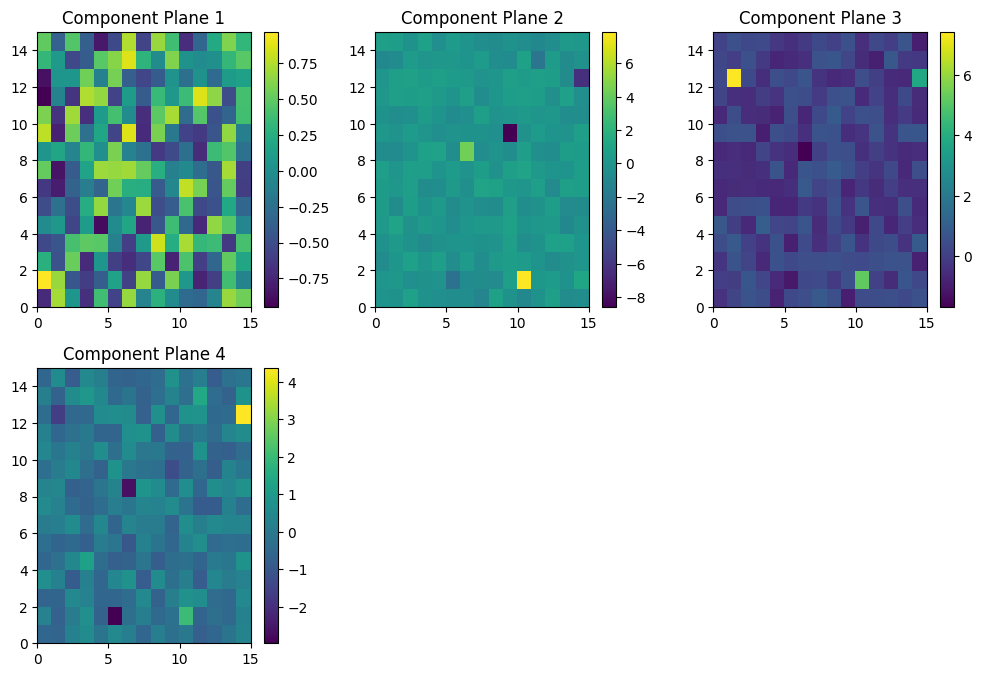

In [36]:
from minisom import MiniSom

# Define SOM parameters
m = [(10, 10), (15, 15)]
l = [0.1, 0.5, 0.9]
n = ['gaussian', 'bubble', 'triangle']

for map_size in m:
    for learning_rate in l:
        for neighborhood_function in n:
            print(f'Parameters: map_size={map_size}, learning_rate={learning_rate}, neighborhood_function={neighborhood_function}')

            # Create and train the SOM
            som = MiniSom(map_size[0], map_size[1], X.shape[1], learning_rate=learning_rate, neighborhood_function=neighborhood_function)
            som.train(X.values, 100)

            # Plot the U-Matrix
            plt.figure(figsize=(10, 10))
            plt.pcolor(som.distance_map().T, cmap='viridis')
            plt.title('U-Matrix')
            plt.colorbar()
            plt.show()

            # Plot the component planes for the best map
            plt.figure(figsize=(10, 10))
            for i, f in enumerate(data.columns[:-1]):
                plt.subplot(3, 3, i + 1)
                plt.pcolor(som.get_weights()[:, :, i].T, cmap='viridis')
                plt.title(f'Component Plane {i + 1}')
                plt.colorbar()

            plt.tight_layout()
            plt.show()
